In [103]:
#REHAM_NOOR_DT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [81]:
#loading the data from CSV file 
df=pd.read_csv('finalDataset.csv')
df.columns


Index(['Side Chest Airbag-Driver', 'Side Chest Airbag-Passenger',
       'AEB Vulnerable Road Users', 'Side Head Airbag-Driver',
       'Side Head Airbag-Passenger', 'Seatbelt Reminder-Passenger',
       'AEB Car-to-Car', 'Belt Loadlimiter-Rear', 'Belt Pretensioner-Rear',
       'Side Head Airbag-Rear', 'Lane Assist System', 'Seatbelt Reminder-Rear',
       'Safety Assist', 'Speed Assistance', 'Adult Occupant',
       'Centre Airbag-Driver', 'Child Occupant', 'Rate', 'Tested Model',
       'Isofix/i-Size-Passenger'],
      dtype='object')

In [82]:

#dividing data set into test train
df_featuers=['Side Chest Airbag-Driver', 'Side Chest Airbag-Passenger','AEB Vulnerable Road Users', 'Side Head Airbag-Driver','Side Head Airbag-Passenger', 'Seatbelt Reminder-Passenger','AEB Car-to-Car', 'Belt Loadlimiter-Rear', 'Belt Pretensioner-Rear','Side Head Airbag-Rear', 'Lane Assist System', 'Seatbelt Reminder-Rear','Safety Assist', 'Speed Assistance', 'Adult Occupant','Centre Airbag-Driver', 'Child Occupant',  'Tested Model','Isofix/i-Size-Passenger']


x=df[df_featuers]
y=df['Rate']# here what we want to predecit
X_train , X_test, Y_train , Y_test= train_test_split(x,y,test_size=0.30,stratify=y,random_state=0)

In [45]:
#importing the classfier

clf=DecisionTreeClassifier(random_state=0)
clf=clf.fit(X_train,Y_train)

In [46]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [47]:
pred = clf.predict(X_test)
pred


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       4, 4, 5, 5, 3, 5, 5, 4, 3, 5, 5, 5, 5, 5, 3, 5, 4, 5, 4, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 2, 4, 1, 5, 3, 4, 5, 4, 5, 5, 4, 5, 5, 5, 3,
       4, 3, 1, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 3], dtype=int64)

In [48]:
clf.predict_proba(X_test)

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0.

In [49]:
# know we will see if the model is good or not by comparing to the actial information
#by using performance matrix

accuracy_score(Y_test,pred)



0.9148936170212766

In [ ]:
#confusion_matrix

In [50]:
#report 
print(classification_report(Y_test,pred,target_names=['0','1','2','3','4','5']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       0.79      0.73      0.76        15
           5       0.94      0.96      0.95        68

    accuracy                           0.91        94
   macro avg       0.70      0.78      0.73        94
weighted avg       0.91      0.91      0.91        94



c:\Users\reham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\reham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\reham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


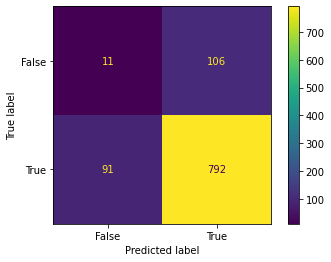

In [86]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

<AxesSubplot:>

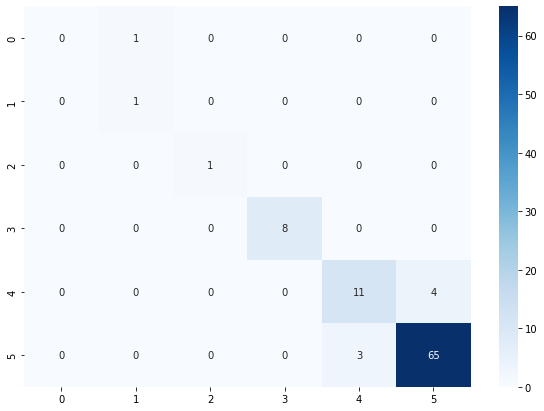

In [97]:
#confusion_matrix
#the result will show how mwny sucessful predition and wrong from each class

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, fmt='.2g', cmap='Blues')

# TN   FP
# FN   TP


In [98]:
#optimization
param_grid={
    "max_depth":[2,4,6],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]}
grid_search= GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)

grid_search.fit(X_train,Y_train)
print("Best hyper-param: ",grid_search.best_params_ )
print("Best estimator: ",grid_search.best_estimator_ )
print("Best score: ",grid_search.best_score_ )


c:\Users\reham\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best hyper-param:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best estimator:  DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=0)
Best score:  0.9220930232558139


<AxesSubplot:>

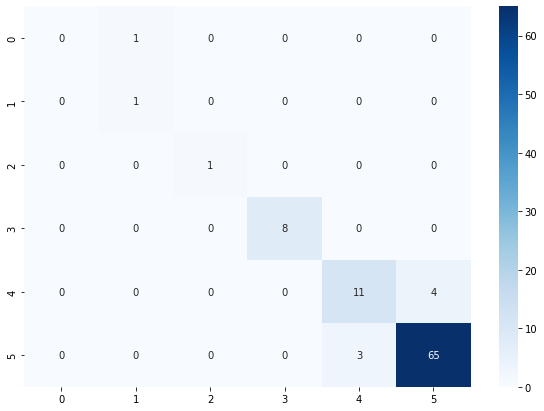

In [99]:
#confusion_matrix
#the result will show how mwny sucessful predition and wrong from each class

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, fmt='.2g', cmap='Blues')

# TN   FP
# FN   TP


In [101]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

sm = SMOTE(random_state = 2)
X_train, Y_train = sm.fit_sample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))


Before OverSampling, counts of label '1': 2
Before OverSampling, counts of label '0': 2 



ModuleNotFoundError: No module named 'imblearn'